># Import Libraries

In [96]:

import warnings
warnings.filterwarnings("ignore")

import os
import random
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#from lib_file import lib_path
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

># Data Loading

In [97]:
df = pd.read_csv("dataset/smart_city_dataset.csv")

In [98]:
df.head()

,City Name,Population,Area (sq. km),Smart Infrastructure Score,Energy Consumption,Public Transport Usage,Air Quality Index,Education Index,Healthcare Index,Employment Rate,Smart Grid Adoption,Waste Management Score,Internet Speed (Mbps),Safety Index,Cost of Living Index
0,City1,5096012,618.03,60.36,337.59,33.79,52.05,54.97,88.72,33.70,8.99,37.49,296.57,43.86,40.09
1,City2,6354413,931.44,3.39,917.83,20.30,11.59,1.89,28.30,55.46,50.15,54.79,715.36,30.34,51.42
2,City3,5757525,160.87,90.22,678.09,79.10,44.62,2.91,53.81,20.20,36.25,59.24,837.28,72.02,112.29
3,City4,9154133,657.85,81.41,369.49,63.72,62.36,59.26,62.61,61.53,14.94,39.61,291.07,24.51,45.84
4,City5,3714568,169.38,48.59,666.52,30.59,30.86,20.01,14.70,40.97,87.43,59.98,737.42,98.19,111.31


In [99]:
df.shape

(5000, 15)

In [100]:
df.columns.tolist()

['City Name',
 'Population',
 'Area (sq. km)',
 'Smart Infrastructure Score',
 'Energy Consumption',
 'Public Transport Usage',
 'Air Quality Index',
 'Education Index',
 'Healthcare Index',
 'Employment Rate',
 'Smart Grid Adoption',
 'Waste Management Score',
 'Internet Speed (Mbps)',
 'Safety Index',
 'Cost of Living Index']

In [101]:
df = df.drop(labels = ['City Name', 'Smart Infrastructure Score', 'Smart Grid Adoption'], axis=1)
df.head()

,Population,Area (sq. km),Energy Consumption,Public Transport Usage,Air Quality Index,Education Index,Healthcare Index,Employment Rate,Waste Management Score,Internet Speed (Mbps),Safety Index,Cost of Living Index
0,5096012,618.03,337.59,33.79,52.05,54.97,88.72,33.70,37.49,296.57,43.86,40.09
1,6354413,931.44,917.83,20.30,11.59,1.89,28.30,55.46,54.79,715.36,30.34,51.42
2,5757525,160.87,678.09,79.10,44.62,2.91,53.81,20.20,59.24,837.28,72.02,112.29
3,9154133,657.85,369.49,63.72,62.36,59.26,62.61,61.53,39.61,291.07,24.51,45.84
4,3714568,169.38,666.52,30.59,30.86,20.01,14.70,40.97,59.98,737.42,98.19,111.31


In [102]:
df.isnull().sum()

Population                0
Area (sq. km)             0
Energy Consumption        0
Public Transport Usage    0
Air Quality Index         0
Education Index           0
Healthcare Index          0
Employment Rate           0
Waste Management Score    0
Internet Speed (Mbps)     0
Safety Index              0
Cost of Living Index      0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Population              5000 non-null   int64  
 1   Area (sq. km)           5000 non-null   float64
 2   Energy Consumption      5000 non-null   float64
 3   Public Transport Usage  5000 non-null   float64
 4   Air Quality Index       5000 non-null   float64
 5   Education Index         5000 non-null   float64
 6   Healthcare Index        5000 non-null   float64
 7   Employment Rate         5000 non-null   float64
 8   Waste Management Score  5000 non-null   float64
 9   Internet Speed (Mbps)   5000 non-null   float64
 10  Safety Index            5000 non-null   float64
 11  Cost of Living Index    5000 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 468.9 KB


># Employment Rate

In [104]:
X = df.drop(labels='Employment Rate', axis=1)
y = df[['Employment Rate']]

In [105]:
X.head()

,Population,Area (sq. km),Energy Consumption,Public Transport Usage,Air Quality Index,Education Index,Healthcare Index,Waste Management Score,Internet Speed (Mbps),Safety Index,Cost of Living Index
0,5096012,618.03,337.59,33.79,52.05,54.97,88.72,37.49,296.57,43.86,40.09
1,6354413,931.44,917.83,20.30,11.59,1.89,28.30,54.79,715.36,30.34,51.42
2,5757525,160.87,678.09,79.10,44.62,2.91,53.81,59.24,837.28,72.02,112.29
3,9154133,657.85,369.49,63.72,62.36,59.26,62.61,39.61,291.07,24.51,45.84
4,3714568,169.38,666.52,30.59,30.86,20.01,14.70,59.98,737.42,98.19,111.31


In [106]:
y.head()

,Employment Rate
0,33.70
1,55.46
2,20.20
3,61.53
4,40.97


In [107]:
er_feature_scaler = MinMaxScaler()

er_feature_scaler = er_feature_scaler.fit(X.values)
X_scaled = er_feature_scaler.transform(X.values)

X = pd.DataFrame(data=X_scaled, columns=X.columns)
X.head()

,Population,Area (sq. km),Energy Consumption,Public Transport Usage,Air Quality Index,Education Index,Healthcare Index,Waste Management Score,Internet Speed (Mbps),Safety Index,Cost of Living Index
0,0.509187,0.614530,0.263979,0.383836,0.467430,0.5497,0.887366,0.374712,0.295841,0.438719,0.112124
1,0.635193,0.931343,0.908991,0.203921,0.017675,0.0189,0.282985,0.547764,0.715369,0.303452,0.238026
2,0.575425,0.152407,0.642489,0.988130,0.384838,0.0291,0.538161,0.592278,0.837504,0.720460,0.914435
3,0.915533,0.654782,0.299440,0.783009,0.582036,0.5926,0.626188,0.395919,0.290331,0.245123,0.176020
4,0.370861,0.161009,0.629627,0.341158,0.231881,0.2001,0.146944,0.599680,0.737468,0.982291,0.903545


In [108]:
with open(file="models/er_feature_scaler.pkl", mode="wb") as file:
    pickle.dump(obj=er_feature_scaler, file=file)

In [109]:
er_target_scaler = MinMaxScaler()

er_target_scaler = er_target_scaler.fit(y.values)
y_scaled = er_target_scaler.transform(y.values)

y = pd.DataFrame(data=y_scaled, columns=y.columns)
y.head()

,Employment Rate
0,0.336768
1,0.554477
2,0.201701
3,0.615208
4,0.409505


In [110]:
with open(file="models/er_target_scaler.pkl", mode="wb") as file:
    pickle.dump(obj=er_target_scaler, file=file)

># Data Splitting

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4000, 11) (1000, 11) (4000, 1) (1000, 1)


In [112]:
X_train.head()

,Population,Area (sq. km),Energy Consumption,Public Transport Usage,Air Quality Index,Education Index,Healthcare Index,Waste Management Score,Internet Speed (Mbps),Safety Index,Cost of Living Index
4227,0.537919,0.905283,0.560795,0.943718,0.938306,0.5307,0.872962,0.628188,0.141279,0.855128,0.322480
4676,0.156803,0.933152,0.374530,0.905308,0.212317,0.6557,0.678404,0.432930,0.620482,0.152176,0.750306
800,0.214197,0.391636,0.973921,0.274473,0.927190,0.2219,0.942183,0.596879,0.813251,0.945773,0.400044
3671,0.529594,0.351667,0.586952,0.225393,0.394286,0.4155,0.584175,0.835251,0.229274,0.826713,0.324369
4193,0.235069,0.610608,0.757387,0.627634,0.088039,0.4843,0.670301,0.854356,0.886320,0.846823,0.419380


In [113]:
y_train.head()

,Employment Rate
4227,0.631016
4676,0.721161
800,0.046323
3671,0.138269
4193,0.169485


In [114]:
X_test.head()

,Population,Area (sq. km),Energy Consumption,Public Transport Usage,Air Quality Index,Education Index,Healthcare Index,Waste Management Score,Internet Speed (Mbps),Safety Index,Cost of Living Index
1501,0.133276,0.873562,0.280220,0.491331,0.216207,0.5825,0.987796,0.809743,0.690716,0.708354,0.031337
2586,0.344828,0.377919,0.932646,0.198986,0.698977,0.6632,0.487746,0.088126,0.056449,0.546173,0.123347
2653,0.565941,0.351172,0.590976,0.918245,0.582926,0.7426,0.852156,0.025908,0.342543,0.086743,0.747083
1055,0.099558,0.434577,0.179017,0.092558,0.887617,0.8423,0.911073,0.068421,0.417926,0.822211,0.508834
705,0.738368,0.830631,0.269492,0.556282,0.059804,0.4583,0.724717,0.812644,0.808703,0.323862,0.534948


In [115]:
y_test.head()

,Employment Rate
1501,0.418409
2586,0.913057
2653,0.533767
1055,0.872136
705,0.958579


>## Algorithm: RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators=1000)
RF_model = RF_model.fit(X_train.values, y_train.values.ravel())

In [ ]:
RF_prediction = RF_model.predict(X_test.values)

print(RF_prediction.tolist())

In [ ]:
print(y_test.values.ravel().tolist())

In [ ]:
RF_MSE = mean_squared_error(y_true=y_test.values.ravel(), y_pred=RF_prediction)

RF_RMSE = np.sqrt(mean_squared_error(y_true=y_test.values.ravel(), y_pred=RF_prediction))

RF_MAE = mean_absolute_error(y_true=y_test.values.ravel(), y_pred=RF_prediction)

In [ ]:
chart_data = [RF_MSE, RF_RMSE, RF_MAE]
chart_labels = ['MSE', 'RMSE', 'MAE']
chart_colors = ['lime', 'seagreen', 'darkgreen']

with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    bars = plt.bar(
        x=chart_labels,
        height=chart_data,
        color=chart_colors
    )
    plt.title(label='Metrics Result of RandomForestRegressor')
    plt.xlabel(xlabel='Metrics')
    plt.ylabel(ylabel='Loss')
    
    for bar, value in zip(bars, chart_data):
        plt.text(
            x=bar.get_x() + bar.get_width() / 2,
            y=bar.get_height(),
            s=f"{value:.3f}",
            ha='center',
            va='bottom'
        )
    plt.show()

In [ ]:
Result = pd.DataFrame()
Result['True Employment Rate'] = er_target_scaler.inverse_transform(y_test.values).ravel()
Result['RFR Prediction'] = er_target_scaler.inverse_transform(RF_prediction.reshape(-1,1)).ravel()

Result.head(10)

In [ ]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    plt.plot(Result['True Employment Rate'], color='orange', label='True Employment Rate')
    plt.plot(Result['RFR Prediction'], color='dodgerblue', label='RFR Prediction')
    plt.title(label='True VS RFR Predicted Employment Rate')
    plt.xlabel(xlabel='Number of samples')
    plt.ylabel(ylabel='Frequency of samples')
    plt.legend()
    plt.show()

In [ ]:
with open(file="models/er_RandomForestRegressor_model.pkl", mode="wb") as file:
    pickle.dump(obj=RF_model, file=file)

>## Algorithm: SupportVectorRegressor

In [ ]:
from sklearn.svm import SVR

SV_model = SVR()
SV_model = SV_model.fit(X_train.values, y_train.values.ravel())

In [ ]:
SV_prediction = SV_model.predict(X_test.values)

print(SV_prediction.tolist())

In [ ]:
print(y_test.values.ravel().tolist())

In [ ]:
SV_MSE = mean_squared_error(y_true=y_test.values.ravel(), y_pred=SV_prediction)

SV_RMSE = np.sqrt(mean_squared_error(y_true=y_test.values.ravel(), y_pred=SV_prediction))

SV_MAE = mean_absolute_error(y_true=y_test.values.ravel(), y_pred=SV_prediction)

In [ ]:
chart_data = [SV_MSE, SV_RMSE, SV_MAE]
chart_labels = ['MSE', 'RMSE', 'MAE']
chart_colors = ['lime', 'seagreen', 'darkgreen']

with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    bars = plt.bar(
        x=chart_labels,
        height=chart_data,
        color=chart_colors
    )
    plt.title(label='Metrics Result of SupportVectorRegressor')
    plt.xlabel(xlabel='Metrics')
    plt.ylabel(ylabel='Loss')
    
    for bar, value in zip(bars, chart_data):
        plt.text(
            x=bar.get_x() + bar.get_width() / 2,
            y=bar.get_height(),
            s=f"{value:.3f}",
            ha='center',
            va='bottom'
        )
    plt.show()

In [ ]:
Result['SVR Prediction'] = er_target_scaler.inverse_transform(SV_prediction.reshape(-1,1)).ravel()

Result.head(10)

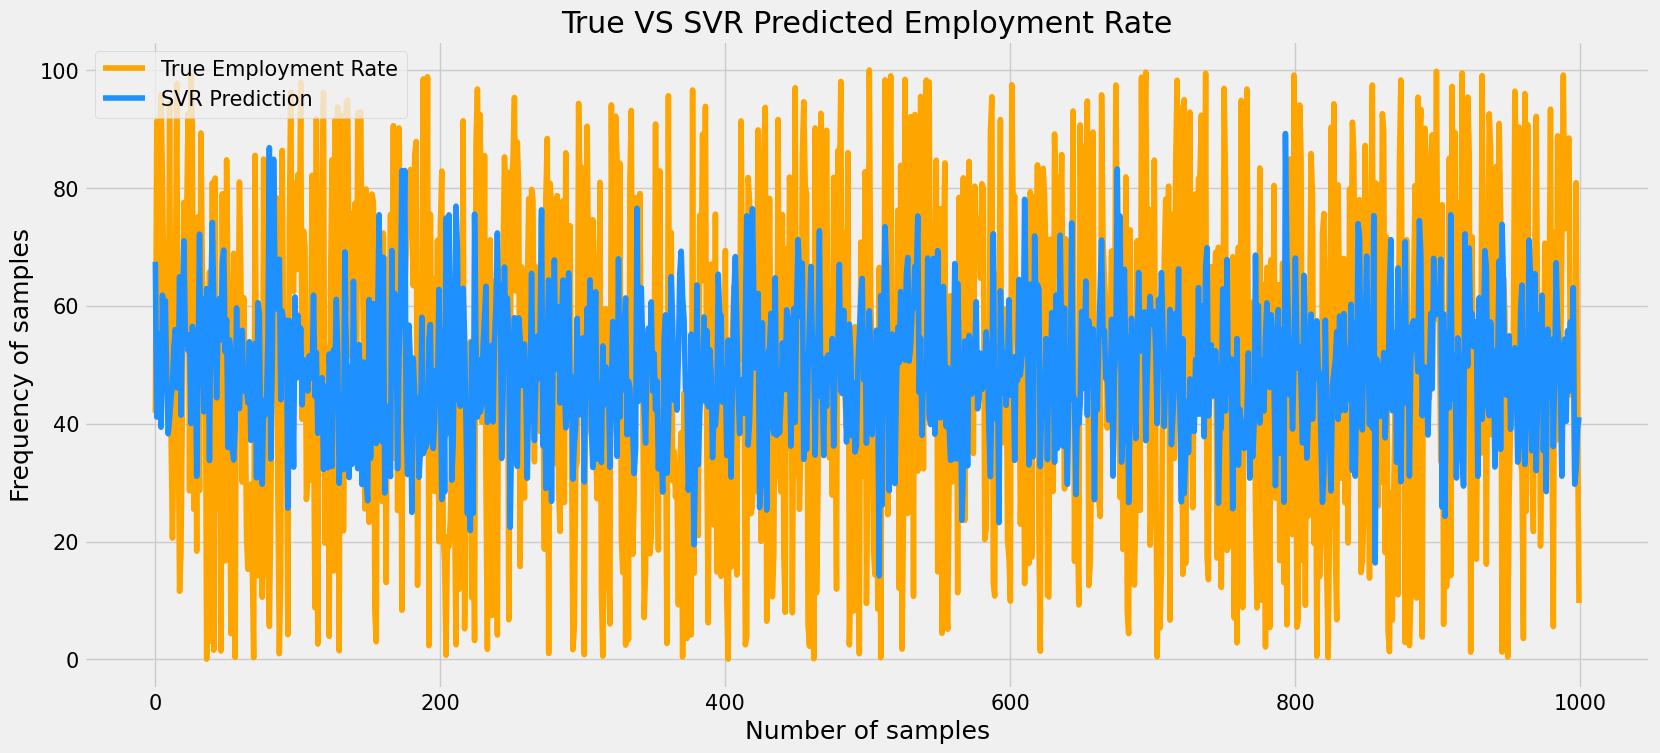

In [35]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    plt.plot(Result['True Employment Rate'], color='orange', label='True Employment Rate')
    plt.plot(Result['SVR Prediction'], color='dodgerblue', label='SVR Prediction')
    plt.title(label='True VS SVR Predicted Employment Rate')
    plt.xlabel(xlabel='Number of samples')
    plt.ylabel(ylabel='Frequency of samples')
    plt.legend()
    plt.show()

In [36]:
with open(file="models/er_SupportVectorRegressor_model.pkl", mode="wb") as file:
    pickle.dump(obj=SV_model, file=file)

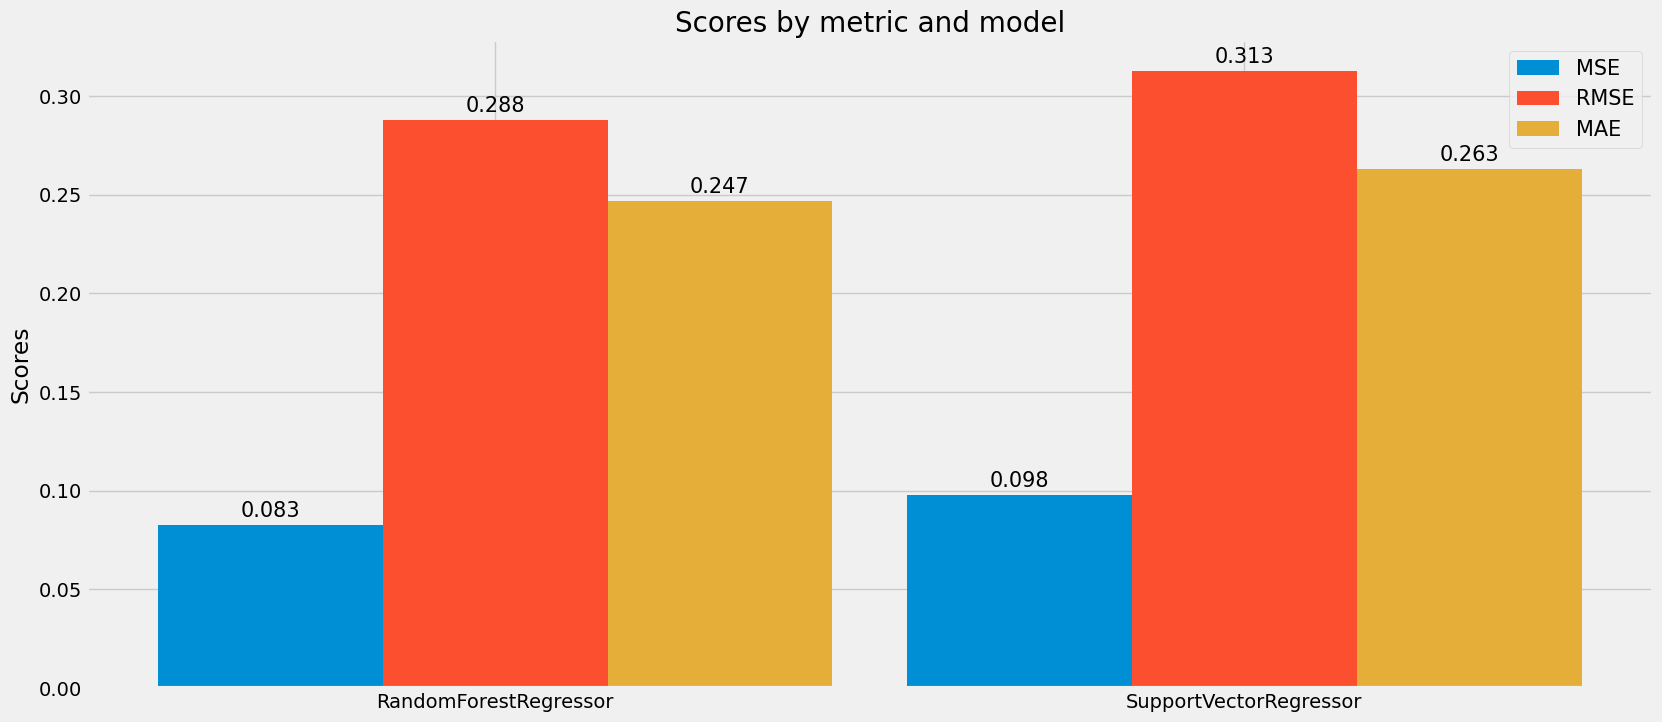

In [37]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

labels = ['RandomForestRegressor', 'SupportVectorRegressor']
mse_scores = [RF_MSE, SV_MSE]
rmse_scores = [RF_RMSE, SV_RMSE]
mae_scores = [RF_MAE, SV_MAE]

x = np.arange(len(labels))
width = 0.3

with plt.style.context(style="fivethirtyeight"):
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.rcParams['font.size'] = 15
    rects1 = ax.bar(x - width, mse_scores, width, label='MSE')
    rects2 = ax.bar(x, rmse_scores, width, label='RMSE')
    rects3 = ax.bar(x + width, mae_scores, width, label='MAE')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    ax.set_ylabel('Scores')
    ax.set_title('Scores by metric and model', fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

># Safety Index

In [38]:
X = df.drop(labels='Safety Index', axis=1)
y = df[['Safety Index']]

In [39]:
X.head()

,Population,Area (sq. km),Energy Consumption,Public Transport Usage,Air Quality Index,Education Index,Healthcare Index,Employment Rate,Waste Management Score,Internet Speed (Mbps),Cost of Living Index
0,5096012,618.03,337.59,33.79,52.05,54.97,88.72,33.70,37.49,296.57,40.09
1,6354413,931.44,917.83,20.30,11.59,1.89,28.30,55.46,54.79,715.36,51.42
2,5757525,160.87,678.09,79.10,44.62,2.91,53.81,20.20,59.24,837.28,112.29
3,9154133,657.85,369.49,63.72,62.36,59.26,62.61,61.53,39.61,291.07,45.84
4,3714568,169.38,666.52,30.59,30.86,20.01,14.70,40.97,59.98,737.42,111.31


In [40]:
y.head()

,Safety Index
0,43.86
1,30.34
2,72.02
3,24.51
4,98.19


In [41]:
si_feature_scaler = MinMaxScaler()

si_feature_scaler = si_feature_scaler.fit(X.values)
X_scaled = si_feature_scaler.transform(X.values)

X = pd.DataFrame(data=X_scaled, columns=X.columns)
X.head()

,Population,Area (sq. km),Energy Consumption,Public Transport Usage,Air Quality Index,Education Index,Healthcare Index,Employment Rate,Waste Management Score,Internet Speed (Mbps),Cost of Living Index
0,0.509187,0.614530,0.263979,0.383836,0.467430,0.5497,0.887366,0.336768,0.374712,0.295841,0.112124
1,0.635193,0.931343,0.908991,0.203921,0.017675,0.0189,0.282985,0.554477,0.547764,0.715369,0.238026
2,0.575425,0.152407,0.642489,0.988130,0.384838,0.0291,0.538161,0.201701,0.592278,0.837504,0.914435
3,0.915533,0.654782,0.299440,0.783009,0.582036,0.5926,0.626188,0.615208,0.395919,0.290331,0.176020
4,0.370861,0.161009,0.629627,0.341158,0.231881,0.2001,0.146944,0.409505,0.599680,0.737468,0.903545


In [42]:
with open(file="models/si_feature_scaler.pkl", mode="wb") as file:
    pickle.dump(obj=si_feature_scaler, file=file)

In [43]:
si_target_scaler = MinMaxScaler()

si_target_scaler = si_target_scaler.fit(y.values)
y_scaled = si_target_scaler.transform(y.values)

y = pd.DataFrame(data=y_scaled, columns=y.columns)
y.head()

,Safety Index
0,0.438719
1,0.303452
2,0.720460
3,0.245123
4,0.982291


In [44]:
with open(file="models/si_target_scaler.pkl", mode="wb") as file:
    pickle.dump(obj=si_target_scaler, file=file)

>## Data Splitting

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4000, 11) (1000, 11) (4000, 1) (1000, 1)


In [46]:
X_train.head()

,Population,Area (sq. km),Energy Consumption,Public Transport Usage,Air Quality Index,Education Index,Healthcare Index,Employment Rate,Waste Management Score,Internet Speed (Mbps),Cost of Living Index
4227,0.537919,0.905283,0.560795,0.943718,0.938306,0.5307,0.872962,0.631016,0.628188,0.141279,0.322480
4676,0.156803,0.933152,0.374530,0.905308,0.212317,0.6557,0.678404,0.721161,0.432930,0.620482,0.750306
800,0.214197,0.391636,0.973921,0.274473,0.927190,0.2219,0.942183,0.046323,0.596879,0.813251,0.400044
3671,0.529594,0.351667,0.586952,0.225393,0.394286,0.4155,0.584175,0.138269,0.835251,0.229274,0.324369
4193,0.235069,0.610608,0.757387,0.627634,0.088039,0.4843,0.670301,0.169485,0.854356,0.886320,0.419380


In [47]:
y_train.head()

,Safety Index
4227,0.855128
4676,0.152176
800,0.945773
3671,0.826713
4193,0.846823


In [48]:
X_test.head()

,Population,Area (sq. km),Energy Consumption,Public Transport Usage,Air Quality Index,Education Index,Healthcare Index,Employment Rate,Waste Management Score,Internet Speed (Mbps),Cost of Living Index
1501,0.133276,0.873562,0.280220,0.491331,0.216207,0.5825,0.987796,0.418409,0.809743,0.690716,0.031337
2586,0.344828,0.377919,0.932646,0.198986,0.698977,0.6632,0.487746,0.913057,0.088126,0.056449,0.123347
2653,0.565941,0.351172,0.590976,0.918245,0.582926,0.7426,0.852156,0.533767,0.025908,0.342543,0.747083
1055,0.099558,0.434577,0.179017,0.092558,0.887617,0.8423,0.911073,0.872136,0.068421,0.417926,0.508834
705,0.738368,0.830631,0.269492,0.556282,0.059804,0.4583,0.724717,0.958579,0.812644,0.808703,0.534948


In [49]:
y_test.head()

,Safety Index
1501,0.708354
2586,0.546173
2653,0.086743
1055,0.822211
705,0.323862


>## Algorithm: DecisionTreeRegressor

In [50]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model = DT_model.fit(X_train.values, y_train.values.ravel())

In [51]:
DT_prediction = DT_model.predict(X_test.values)

print(DT_prediction.tolist())

[0.4592296148074037, 0.3076538269134568, 0.5468734367183593, 0.263231615807904, 0.33936968484242125, 0.5048524262131067, 0.01950975487743872, 0.07803901950975488, 0.4172086043021511, 0.6165082541270637, 0.891845922961481, 0.2216108054027014, 0.9808904452226115, 0.870335167583792, 0.0797398699349675, 0.03331665832916459, 0.2669334667333667, 0.17318659329664834, 0.00880440220110055, 0.41900950475237625, 0.6263131565782892, 0.0992496248124062, 0.39979989994997506, 0.28324162081040527, 0.3583791895947974, 0.6392196098049026, 0.6610305152576289, 0.7028514257128566, 0.9678839419709857, 0.37248624312156087, 0.8615307653826916, 0.05612806403201602, 0.10365182591295648, 0.7347673836918461, 0.9189594797398701, 0.010505252626313159, 0.1580790395197599, 0.3687843921960981, 0.07893946973486744, 0.5073536768384194, 0.2899449724862431, 0.463831915957979, 0.9590795397698851, 0.8534267133566785, 0.030115057528764387, 0.4979489744872437, 0.4027013506753377, 0.0017008504252126063, 0.8449224612306154, 0.1

In [52]:
print(y_test.values.ravel().tolist())

[0.7083541770885444, 0.5461730865432718, 0.08674337168584292, 0.8222111055527765, 0.3238619309654828, 0.14297148574287147, 0.1787893946973487, 0.9159579789894949, 0.8903451725862933, 0.4801400700350176, 0.6519259629814909, 0.28814407203601805, 0.3235617808904453, 0.15717858929464734, 0.1054527263631816, 0.5474737368684344, 0.37528764382191104, 0.3208604302151076, 0.8457228614307156, 0.836518259129565, 0.17698849424712357, 0.3731865932966484, 0.9374687343671837, 0.10195097548774387, 0.9386693346673338, 0.7460730365182593, 0.37588794397198605, 0.8752376188094049, 0.21080540270135067, 0.5238619309654828, 0.4675337668834418, 0.9343671835917962, 0.2920460230115058, 0.6967483741870938, 0.16938469234617312, 0.45692846423211614, 0.4436218109054528, 0.7617808904452228, 0.43541770885442727, 0.8997498749374689, 0.03691845922961482, 0.13206603301650827, 0.28954477238619314, 0.26283141570785395, 0.4662331165582792, 0.3658829414707354, 0.5490745372686344, 0.6098049024512258, 0.20370185092546278, 0.0

In [53]:
DT_MSE = mean_squared_error(y_true=y_test.values.ravel(), y_pred=DT_prediction)

DT_RMSE = np.sqrt(mean_squared_error(y_true=y_test.values.ravel(), y_pred=DT_prediction))

DT_MAE = mean_absolute_error(y_true=y_test.values.ravel(), y_pred=DT_prediction)

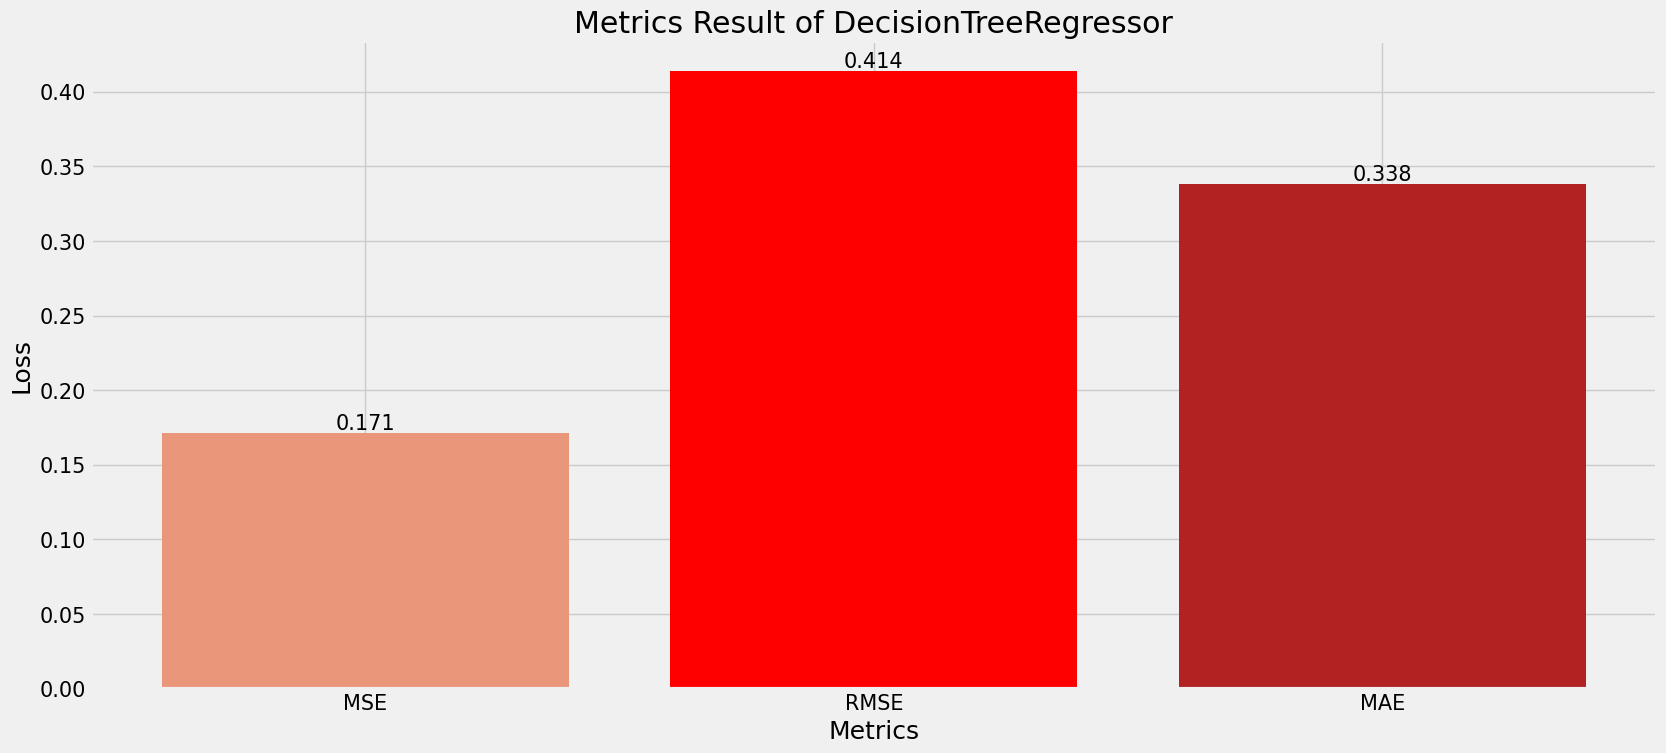

In [54]:
chart_data = [DT_MSE, DT_RMSE, DT_MAE]
chart_labels = ['MSE', 'RMSE', 'MAE']
chart_colors = ['darksalmon', 'red', 'firebrick']

with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    bars = plt.bar(
        x=chart_labels,
        height=chart_data,
        color=chart_colors
    )
    plt.title(label='Metrics Result of DecisionTreeRegressor')
    plt.xlabel(xlabel='Metrics')
    plt.ylabel(ylabel='Loss')
    
    for bar, value in zip(bars, chart_data):
        plt.text(
            x=bar.get_x() + bar.get_width() / 2,
            y=bar.get_height(),
            s=f"{value:.3f}",
            ha='center',
            va='bottom'
        )
    plt.show()

In [55]:
Result = pd.DataFrame()
Result['True Safety Index'] = si_target_scaler.inverse_transform(y_test.values).ravel()
Result['DTR Prediction'] = si_target_scaler.inverse_transform(DT_prediction.reshape(-1,1)).ravel()

Result.head(10)

,True Safety Index,DTR Prediction
0,70.81,45.91
1,54.60,30.76
2,8.68,54.67
3,82.19,26.32
4,32.38,33.93
5,14.30,50.47
6,17.88,1.96
7,91.56,7.81
8,89.00,41.71
9,48.00,61.63


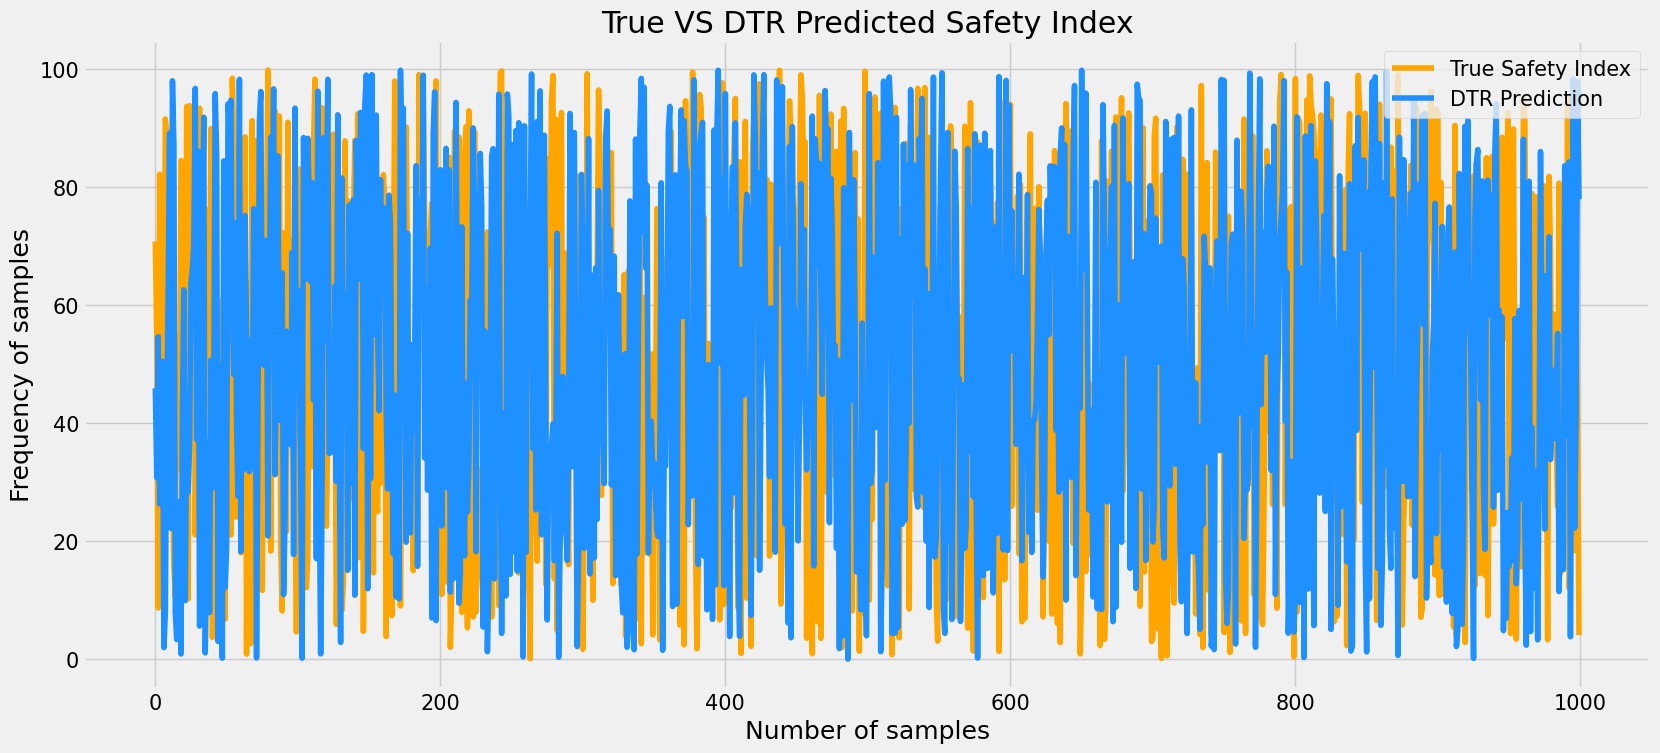

In [56]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    plt.plot(Result['True Safety Index'], color='orange', label='True Safety Index')
    plt.plot(Result['DTR Prediction'], color='dodgerblue', label='DTR Prediction')
    plt.title(label='True VS DTR Predicted Safety Index')
    plt.xlabel(xlabel='Number of samples')
    plt.ylabel(ylabel='Frequency of samples')
    plt.legend()
    plt.show()

In [57]:
with open(file="models/si_DecisionTreeRegressor_model.pkl", mode="wb") as file:
    pickle.dump(obj=DT_model, file=file)

>## Algorithm: AdaBoostRegressor

In [58]:
from sklearn.ensemble import AdaBoostRegressor

AB_model = AdaBoostRegressor(n_estimators=1000)
AB_model = AB_model.fit(X_train.values, y_train.values.ravel())

In [59]:
AB_prediction = AB_model.predict(X_test.values)

print(AB_prediction.tolist())

[0.49198754881226425, 0.49198754881226425, 0.49198754881226425, 0.49198754881226425, 0.500160711423672, 0.500160711423672, 0.49198754881226425, 0.49198754881226425, 0.49794615392802727, 0.49198754881226425, 0.49198754881226425, 0.496805101851626, 0.496805101851626, 0.49794615392802727, 0.4919260214170506, 0.49198754881226425, 0.496805101851626, 0.496805101851626, 0.49198754881226425, 0.496805101851626, 0.496805101851626, 0.496805101851626, 0.49794615392802727, 0.49198754881226425, 0.496805101851626, 0.49794615392802727, 0.500160711423672, 0.496805101851626, 0.49198754881226425, 0.496805101851626, 0.496805101851626, 0.496805101851626, 0.49794615392802727, 0.49198754881226425, 0.49198754881226425, 0.49198754881226425, 0.5068230723734957, 0.49198754881226425, 0.49788440151834507, 0.49794615392802727, 0.500160711423672, 0.5213006914134695, 0.500160711423672, 0.496805101851626, 0.49198754881226425, 0.49794615392802727, 0.5450585554786129, 0.500160711423672, 0.49794615392802727, 0.4968051018

In [60]:
print(y_test.values.ravel().tolist())

[0.7083541770885444, 0.5461730865432718, 0.08674337168584292, 0.8222111055527765, 0.3238619309654828, 0.14297148574287147, 0.1787893946973487, 0.9159579789894949, 0.8903451725862933, 0.4801400700350176, 0.6519259629814909, 0.28814407203601805, 0.3235617808904453, 0.15717858929464734, 0.1054527263631816, 0.5474737368684344, 0.37528764382191104, 0.3208604302151076, 0.8457228614307156, 0.836518259129565, 0.17698849424712357, 0.3731865932966484, 0.9374687343671837, 0.10195097548774387, 0.9386693346673338, 0.7460730365182593, 0.37588794397198605, 0.8752376188094049, 0.21080540270135067, 0.5238619309654828, 0.4675337668834418, 0.9343671835917962, 0.2920460230115058, 0.6967483741870938, 0.16938469234617312, 0.45692846423211614, 0.4436218109054528, 0.7617808904452228, 0.43541770885442727, 0.8997498749374689, 0.03691845922961482, 0.13206603301650827, 0.28954477238619314, 0.26283141570785395, 0.4662331165582792, 0.3658829414707354, 0.5490745372686344, 0.6098049024512258, 0.20370185092546278, 0.0

In [61]:
AB_MSE = mean_squared_error(y_true=y_test.values.ravel(), y_pred=AB_prediction)

AB_RMSE = np.sqrt(mean_squared_error(y_true=y_test.values.ravel(), y_pred=AB_prediction))

AB_MAE = mean_absolute_error(y_true=y_test.values.ravel(), y_pred=AB_prediction)

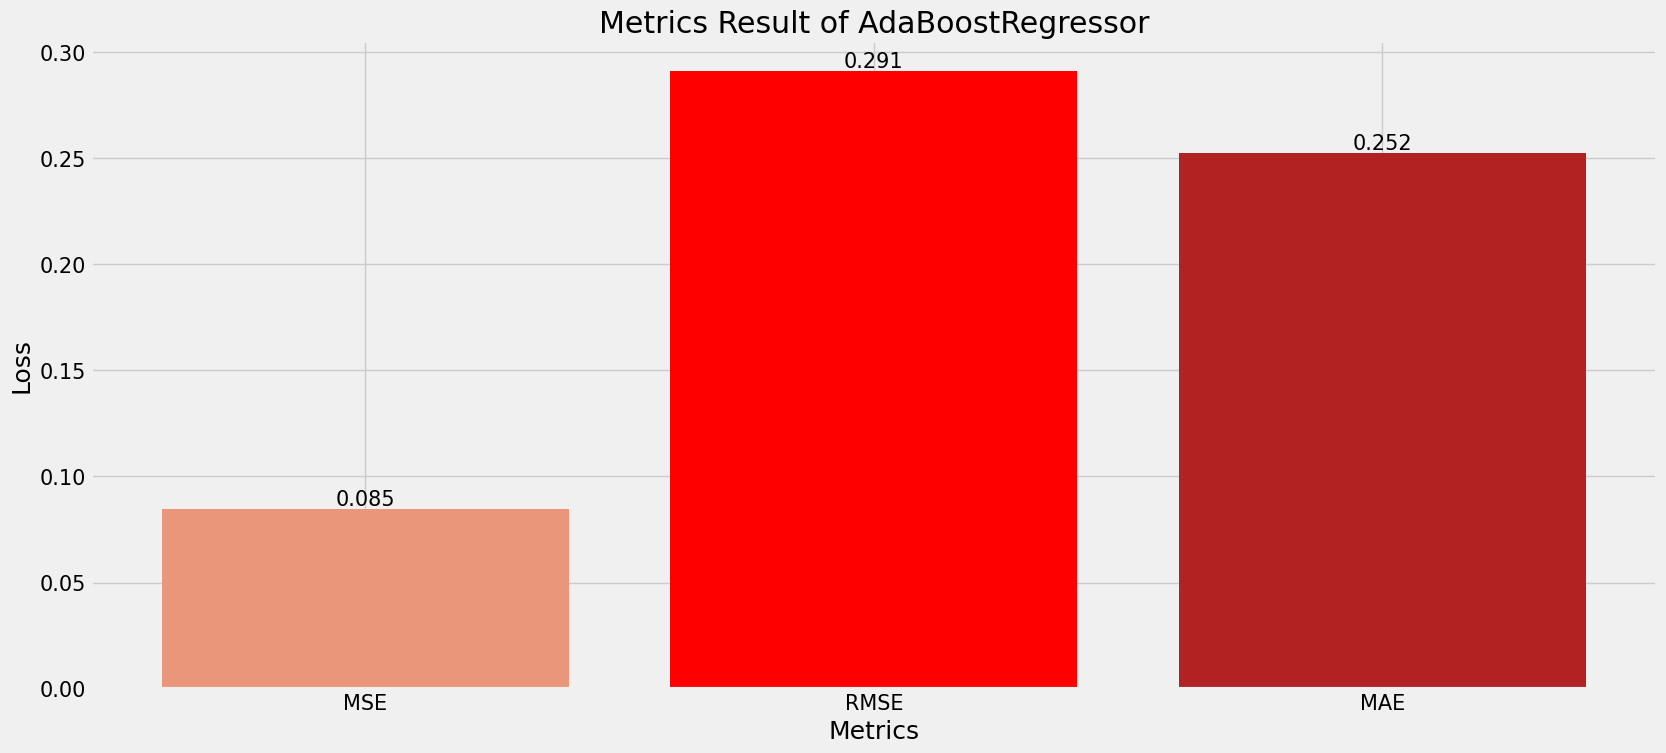

In [62]:
chart_data = [AB_MSE, AB_RMSE, AB_MAE]
chart_labels = ['MSE', 'RMSE', 'MAE']
chart_colors = ['darksalmon', 'red', 'firebrick']

with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    bars = plt.bar(
        x=chart_labels,
        height=chart_data,
        color=chart_colors
    )
    plt.title(label='Metrics Result of AdaBoostRegressor')
    plt.xlabel(xlabel='Metrics')
    plt.ylabel(ylabel='Loss')
    
    for bar, value in zip(bars, chart_data):
        plt.text(
            x=bar.get_x() + bar.get_width() / 2,
            y=bar.get_height(),
            s=f"{value:.3f}",
            ha='center',
            va='bottom'
        )
    plt.show()

In [63]:
Result['ABR Prediction'] = si_target_scaler.inverse_transform(AB_prediction.reshape(-1,1)).ravel()

Result.head(10)

,True Safety Index,DTR Prediction,ABR Prediction
0,70.81,45.91,49.184156
1,54.60,30.76,49.184156
2,8.68,54.67,49.184156
3,82.19,26.32,49.184156
4,32.38,33.93,50.001063
5,14.30,50.47,50.001063
6,17.88,1.96,49.184156
7,91.56,7.81,49.184156
8,89.00,41.71,49.779718
9,48.00,61.63,49.184156


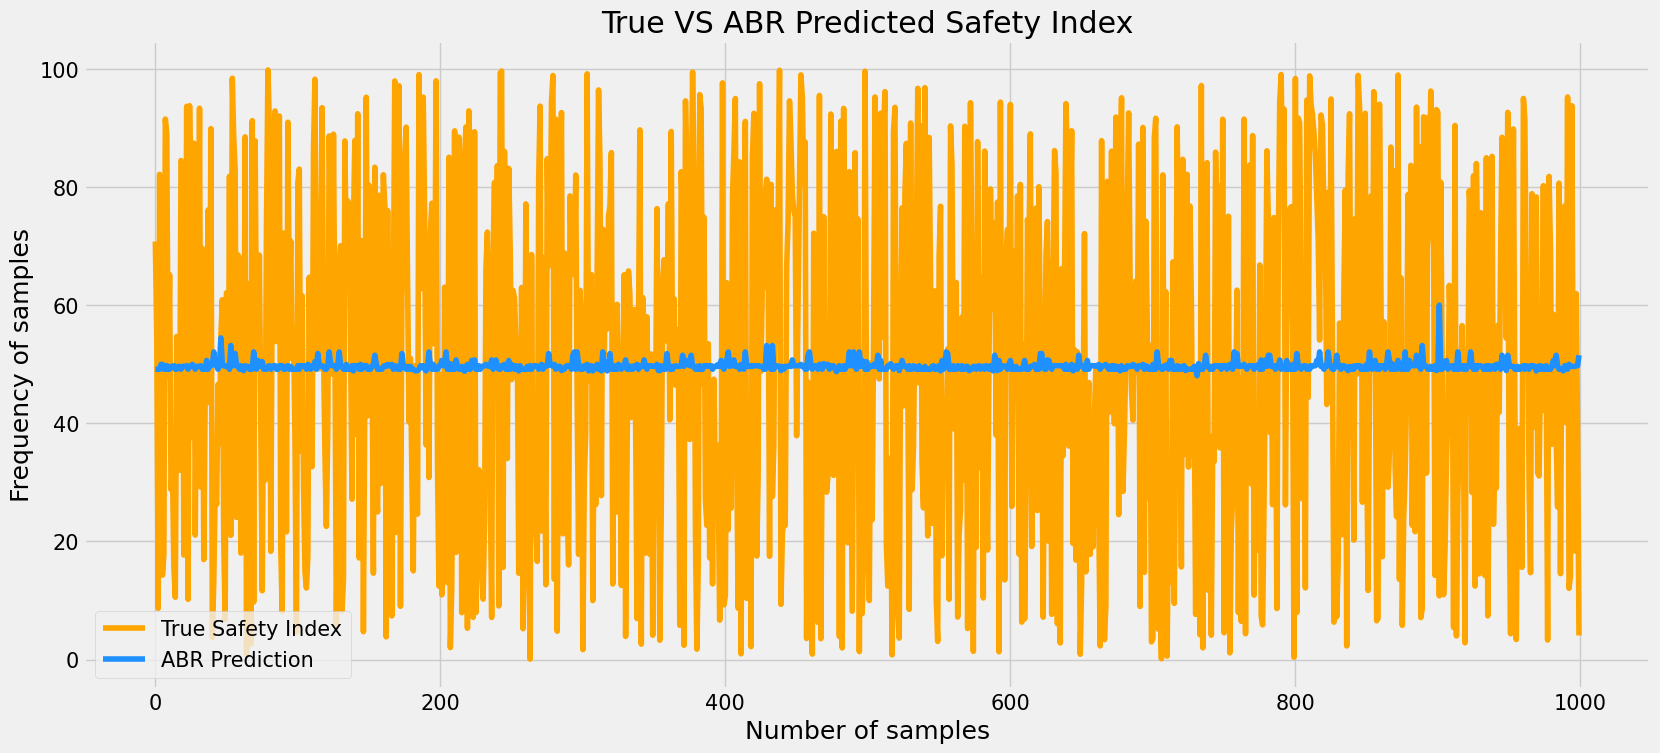

In [64]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    plt.plot(Result['True Safety Index'], color='orange', label='True Safety Index')
    plt.plot(Result['ABR Prediction'], color='dodgerblue', label='ABR Prediction')
    plt.title(label='True VS ABR Predicted Safety Index')
    plt.xlabel(xlabel='Number of samples')
    plt.ylabel(ylabel='Frequency of samples')
    plt.legend()
    plt.show()

In [65]:
with open(file="models/si_AdaBoostRegressor_model.pkl", mode="wb") as file:
    pickle.dump(obj=AB_model, file=file)

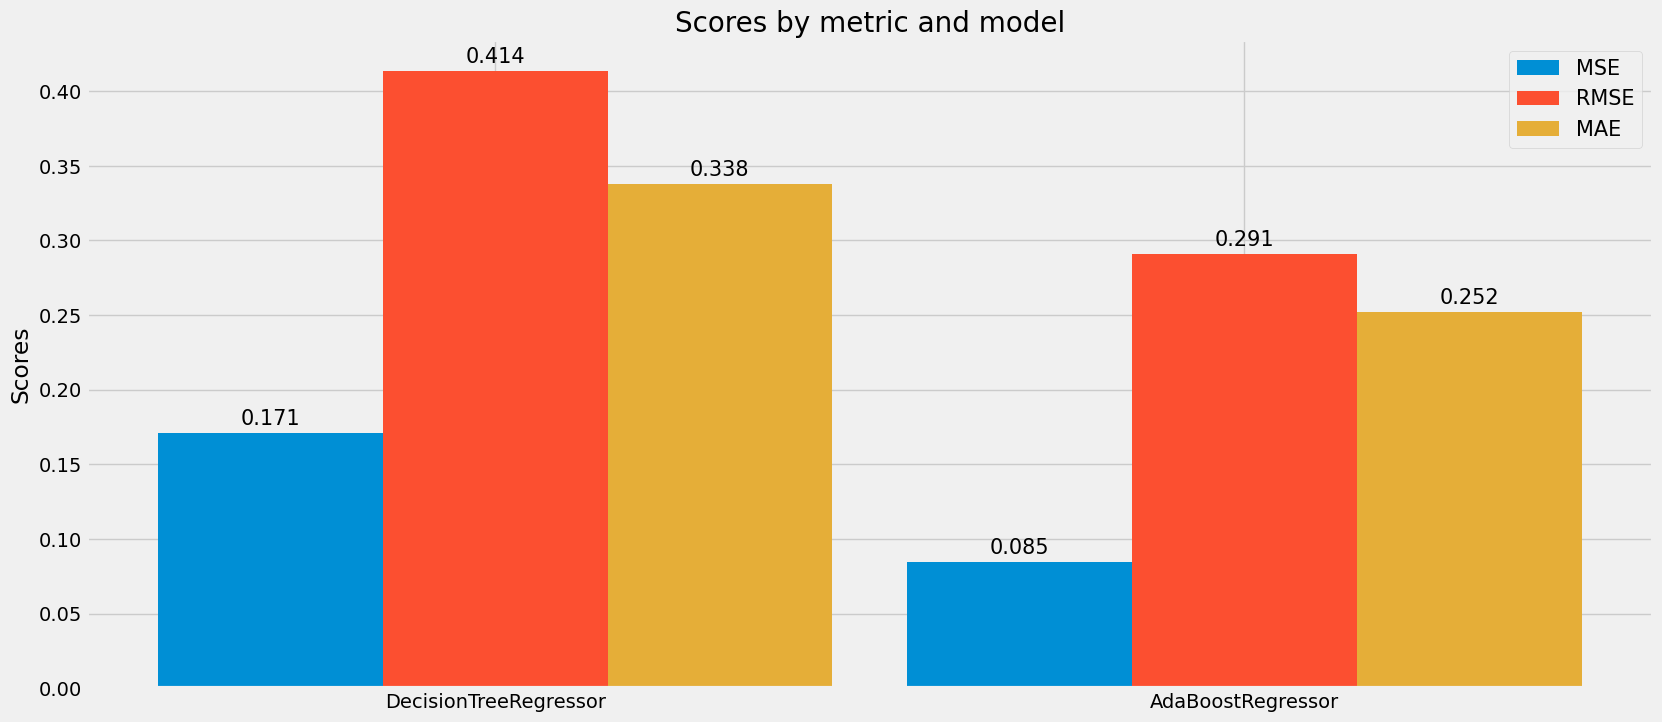

In [66]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

labels = ['DecisionTreeRegressor', 'AdaBoostRegressor']
mse_scores = [DT_MSE, AB_MSE]
rmse_scores = [DT_RMSE, AB_RMSE]
mae_scores = [DT_MAE, AB_MAE]

x = np.arange(len(labels))
width = 0.3

with plt.style.context(style="fivethirtyeight"):
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.rcParams['font.size'] = 15
    rects1 = ax.bar(x - width, mse_scores, width, label='MSE')
    rects2 = ax.bar(x, rmse_scores, width, label='RMSE')
    rects3 = ax.bar(x + width, mae_scores, width, label='MAE')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    ax.set_ylabel('Scores')
    ax.set_title('Scores by metric and model', fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

># Cost of Living Index

In [67]:
X = df.drop(labels='Cost of Living Index', axis=1)
y = df[['Cost of Living Index']]

In [68]:
X.head()

,Population,Area (sq. km),Energy Consumption,Public Transport Usage,Air Quality Index,Education Index,Healthcare Index,Employment Rate,Waste Management Score,Internet Speed (Mbps),Safety Index
0,5096012,618.03,337.59,33.79,52.05,54.97,88.72,33.70,37.49,296.57,43.86
1,6354413,931.44,917.83,20.30,11.59,1.89,28.30,55.46,54.79,715.36,30.34
2,5757525,160.87,678.09,79.10,44.62,2.91,53.81,20.20,59.24,837.28,72.02
3,9154133,657.85,369.49,63.72,62.36,59.26,62.61,61.53,39.61,291.07,24.51
4,3714568,169.38,666.52,30.59,30.86,20.01,14.70,40.97,59.98,737.42,98.19


In [69]:
y.head()

,Cost of Living Index
0,40.09
1,51.42
2,112.29
3,45.84
4,111.31


In [70]:
coli_feature_scaler = MinMaxScaler()

coli_feature_scaler = coli_feature_scaler.fit(X.values)
X_scaled = coli_feature_scaler.transform(X.values)

X = pd.DataFrame(data=X_scaled, columns=X.columns)
X.head()

,Population,Area (sq. km),Energy Consumption,Public Transport Usage,Air Quality Index,Education Index,Healthcare Index,Employment Rate,Waste Management Score,Internet Speed (Mbps),Safety Index
0,0.509187,0.614530,0.263979,0.383836,0.467430,0.5497,0.887366,0.336768,0.374712,0.295841,0.438719
1,0.635193,0.931343,0.908991,0.203921,0.017675,0.0189,0.282985,0.554477,0.547764,0.715369,0.303452
2,0.575425,0.152407,0.642489,0.988130,0.384838,0.0291,0.538161,0.201701,0.592278,0.837504,0.720460
3,0.915533,0.654782,0.299440,0.783009,0.582036,0.5926,0.626188,0.615208,0.395919,0.290331,0.245123
4,0.370861,0.161009,0.629627,0.341158,0.231881,0.2001,0.146944,0.409505,0.599680,0.737468,0.982291


In [71]:
with open(file="models/coli_feature_scaler.pkl", mode="wb") as file:
    pickle.dump(obj=coli_feature_scaler, file=file)

In [72]:
coli_target_scaler = MinMaxScaler()

coli_target_scaler = coli_target_scaler.fit(y.values)
y_scaled = coli_target_scaler.transform(y.values)

y = pd.DataFrame(data=y_scaled, columns=y.columns)
y.head()

,Cost of Living Index
0,0.112124
1,0.238026
2,0.914435
3,0.176020
4,0.903545


In [73]:
with open(file="models/coli_target_scaler.pkl", mode="wb") as file:
    pickle.dump(obj=coli_target_scaler, file=file)

>## Data Splitting

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4000, 11) (1000, 11) (4000, 1) (1000, 1)


In [75]:
X_train.head()

,Population,Area (sq. km),Energy Consumption,Public Transport Usage,Air Quality Index,Education Index,Healthcare Index,Employment Rate,Waste Management Score,Internet Speed (Mbps),Safety Index
4227,0.537919,0.905283,0.560795,0.943718,0.938306,0.5307,0.872962,0.631016,0.628188,0.141279,0.855128
4676,0.156803,0.933152,0.374530,0.905308,0.212317,0.6557,0.678404,0.721161,0.432930,0.620482,0.152176
800,0.214197,0.391636,0.973921,0.274473,0.927190,0.2219,0.942183,0.046323,0.596879,0.813251,0.945773
3671,0.529594,0.351667,0.586952,0.225393,0.394286,0.4155,0.584175,0.138269,0.835251,0.229274,0.826713
4193,0.235069,0.610608,0.757387,0.627634,0.088039,0.4843,0.670301,0.169485,0.854356,0.886320,0.846823


In [76]:
y_train.head()

,Cost of Living Index
4227,0.322480
4676,0.750306
800,0.400044
3671,0.324369
4193,0.419380


In [77]:
X_test.head()

,Population,Area (sq. km),Energy Consumption,Public Transport Usage,Air Quality Index,Education Index,Healthcare Index,Employment Rate,Waste Management Score,Internet Speed (Mbps),Safety Index
1501,0.133276,0.873562,0.280220,0.491331,0.216207,0.5825,0.987796,0.418409,0.809743,0.690716,0.708354
2586,0.344828,0.377919,0.932646,0.198986,0.698977,0.6632,0.487746,0.913057,0.088126,0.056449,0.546173
2653,0.565941,0.351172,0.590976,0.918245,0.582926,0.7426,0.852156,0.533767,0.025908,0.342543,0.086743
1055,0.099558,0.434577,0.179017,0.092558,0.887617,0.8423,0.911073,0.872136,0.068421,0.417926,0.822211
705,0.738368,0.830631,0.269492,0.556282,0.059804,0.4583,0.724717,0.958579,0.812644,0.808703,0.323862


In [78]:
y_test.head()

,Cost of Living Index
1501,0.031337
2586,0.123347
2653,0.747083
1055,0.508834
705,0.534948


>## Algorithm: GradientBoostingRegressor

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

GB_model = GradientBoostingRegressor(n_estimators=1000)
GB_model = GB_model.fit(X_train.values, y_train.values.ravel())

In [80]:
GB_prediction = GB_model.predict(X_test.values)

print(GB_prediction.tolist())

[0.4825404602239581, 0.4807514519359944, 0.34567008516988246, 0.5053078498842255, 0.5921260143377227, 0.44991083519430586, 0.5011594456075746, 0.6873399648182421, 0.5045345956316747, 0.4611634609360621, 0.5765282234584912, 0.6367361244745503, 0.38592252833300744, 0.460502618177449, 0.5085844712004856, 0.5087899293697619, 0.5268092735755937, 0.4073565827508286, 0.4618549698661601, 0.48894544655098454, 0.5893564231684715, 0.29015084718316064, 0.5555922527605374, 0.6114302472766485, 0.4692113867999894, 0.5541014496285865, 0.3887569087324545, 0.5989706060047566, 0.6197175668955325, 0.4461801185692189, 0.5979498533786073, 0.5344601654378554, 0.42802603700686953, 0.5119710955061985, 0.35602275940493644, 0.37706934016074667, 0.24896471411212845, 0.44367025181597225, 0.5202253791352626, 0.38817324431151395, 0.48521263471735043, 0.41470048600611803, 0.6260220225080559, 0.5251656024395627, 0.4123211646059853, 0.6244695226276896, 0.5684520620599213, 0.5764133127096773, 0.44764476016312205, 0.4313

In [81]:
print(y_test.values.ravel().tolist())

[0.03133681520168907, 0.12334703855984003, 0.747083009223247, 0.5088343149238805, 0.5349483275919547, 0.5958439826647406, 0.8166462940326702, 0.11379042115790644, 0.37737526391821313, 0.87720857873097, 0.8587620846760751, 0.4331592399155462, 0.987220802311368, 0.4517168574286033, 0.8430936770752306, 0.1774641626847428, 0.9363262584731638, 0.6147349705522835, 0.8837648627625292, 0.9548838759862208, 0.7900877875319479, 0.3953772641404601, 0.6517390821202358, 0.24036004000444494, 0.5431714634959439, 0.937437493054784, 0.9481053450383377, 0.9169907767529726, 0.5431714634959439, 0.5175019446605178, 0.9963329258806535, 0.04589398822091345, 0.2805867318590955, 0.6078453161462385, 0.3498166462940327, 0.7378597621957996, 0.04944993888209803, 0.3603733748194244, 0.0630070007778642, 0.7825313923769308, 0.5686187354150463, 0.4736081786865208, 0.5108345371707967, 0.9899988887654185, 0.3173685965107234, 0.6250694521613513, 0.7581953550394489, 0.9398822091343484, 0.4673852650294478, 0.117568618735415

In [82]:
GB_MSE = mean_squared_error(y_true=y_test.values.ravel(), y_pred=GB_prediction)

GB_RMSE = np.sqrt(mean_squared_error(y_true=y_test.values.ravel(), y_pred=GB_prediction))

GB_MAE = mean_absolute_error(y_true=y_test.values.ravel(), y_pred=GB_prediction)

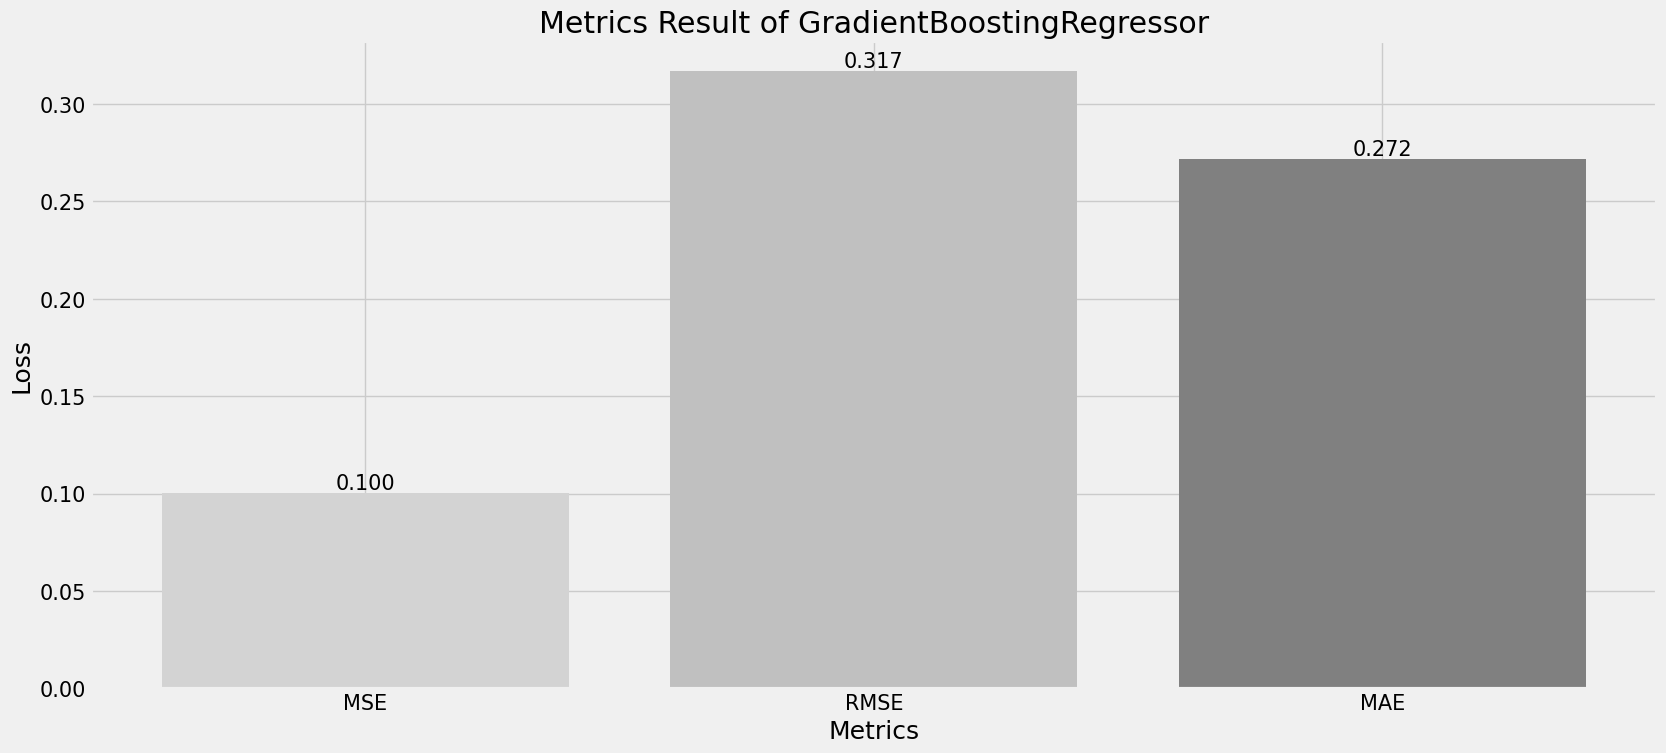

In [83]:
chart_data = [GB_MSE, GB_RMSE, GB_MAE]
chart_labels = ['MSE', 'RMSE', 'MAE']
chart_colors = ['lightgray', 'silver', 'gray']

with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    bars = plt.bar(
        x=chart_labels,
        height=chart_data,
        color=chart_colors
    )
    plt.title(label='Metrics Result of GradientBoostingRegressor')
    plt.xlabel(xlabel='Metrics')
    plt.ylabel(ylabel='Loss')
    
    for bar, value in zip(bars, chart_data):
        plt.text(
            x=bar.get_x() + bar.get_width() / 2,
            y=bar.get_height(),
            s=f"{value:.3f}",
            ha='center',
            va='bottom'
        )
    plt.show()

In [84]:
Result = pd.DataFrame()
Result['True Cost Of Living Index'] = coli_target_scaler.inverse_transform(y_test.values).ravel()
Result['GBR Prediction'] = coli_target_scaler.inverse_transform(GB_prediction.reshape(-1,1)).ravel()

Result.head(10)

,True Cost Of Living Index,GBR Prediction
0,32.82,73.423816
1,41.10,73.262823
2,97.23,61.106851
3,75.79,75.472653
4,78.14,83.285420
5,83.62,70.487476
6,103.49,75.099339
7,40.24,91.853723
8,63.96,75.403068
9,108.94,71.500100


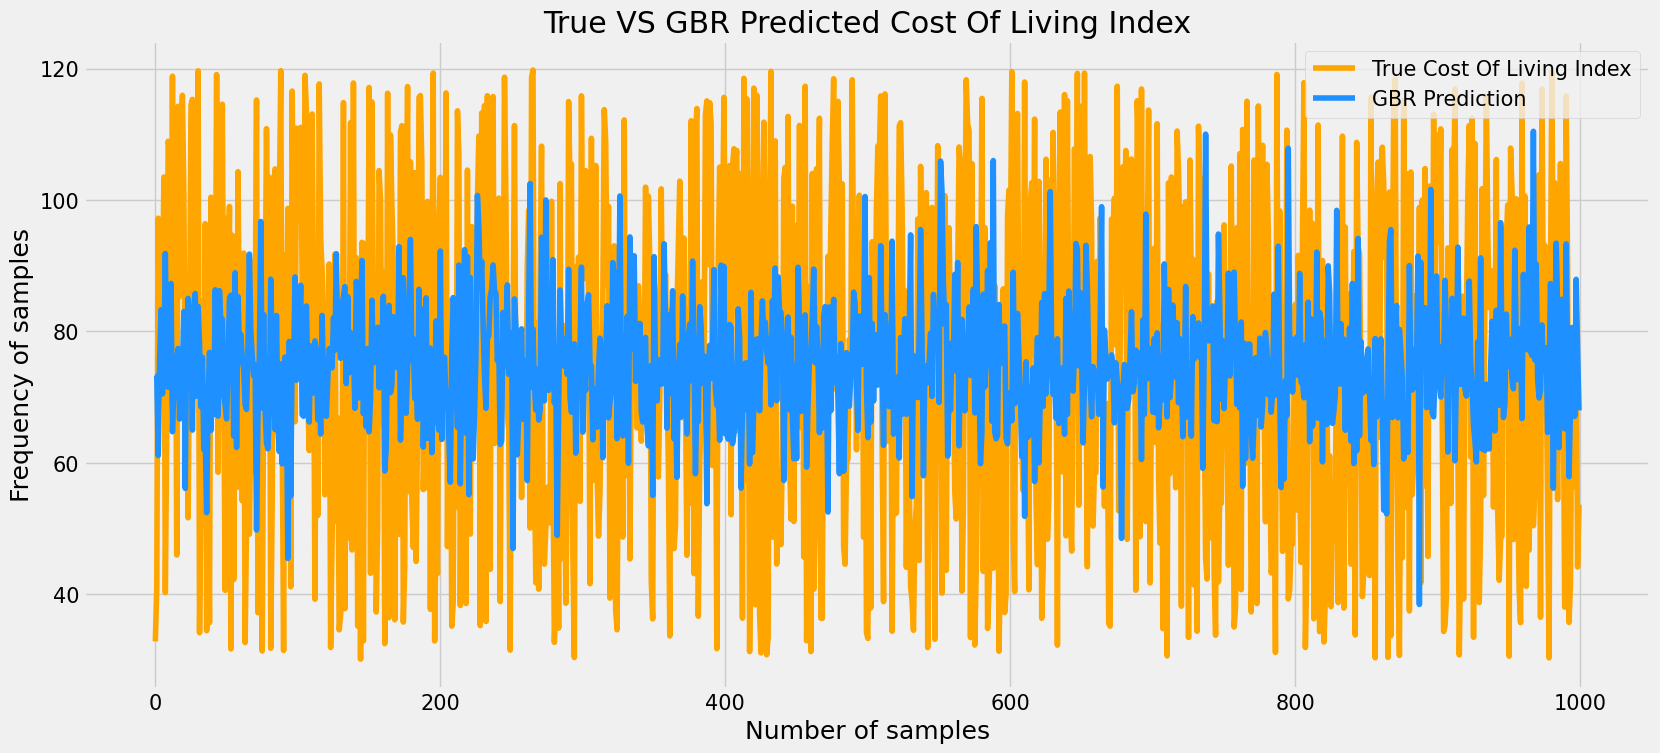

In [85]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    plt.plot(Result['True Cost Of Living Index'], color='orange', label='True Cost Of Living Index')
    plt.plot(Result['GBR Prediction'], color='dodgerblue', label='GBR Prediction')
    plt.title(label='True VS GBR Predicted Cost Of Living Index')
    plt.xlabel(xlabel='Number of samples')
    plt.ylabel(ylabel='Frequency of samples')
    plt.legend()
    plt.show()

In [86]:
with open(file="models/coli_GradientBoosingRegressor_model.pkl", mode="wb") as file:
    pickle.dump(obj=GB_model, file=file)

>## Algorithm: RidgeRegressor

In [87]:
from sklearn.linear_model import Ridge 

RR_model = Ridge()
RR_model = RR_model.fit(X_train.values, y_train.values.ravel())

In [88]:
RR_prediction = RR_model.predict(X_test.values)

print(RR_prediction.tolist())

[0.5218196805252813, 0.4982089162869327, 0.46608828272089786, 0.5040480622993333, 0.5510383005585406, 0.502559135159919, 0.4969888633662188, 0.5012455882642703, 0.49394784742755665, 0.5379531431796143, 0.5199835513170266, 0.5041421842755129, 0.46896662357790114, 0.4468862011841118, 0.5343591573907137, 0.4941648825075975, 0.5091204133347681, 0.43608251186444974, 0.4998110185407536, 0.5191796900516558, 0.489670225251784, 0.4970495995425295, 0.48574435015217604, 0.5321870017572022, 0.48479881359157967, 0.5285878034210267, 0.54743054961706, 0.5155418497323435, 0.5165514257177173, 0.5081188772998857, 0.4969001111999176, 0.4807035012066989, 0.5110650362772822, 0.48462588505574855, 0.4875687063430538, 0.45640209588195096, 0.4934247634855223, 0.4669644570989878, 0.501956533070315, 0.4611420535327159, 0.48936947361352856, 0.47261897713546525, 0.5075569388775424, 0.4940936762755971, 0.5046023664167996, 0.5299619837595887, 0.4652159656892575, 0.48706883567390435, 0.4769254496112174, 0.46146142057

In [89]:
print(y_test.values.ravel().tolist())

[0.03133681520168907, 0.12334703855984003, 0.747083009223247, 0.5088343149238805, 0.5349483275919547, 0.5958439826647406, 0.8166462940326702, 0.11379042115790644, 0.37737526391821313, 0.87720857873097, 0.8587620846760751, 0.4331592399155462, 0.987220802311368, 0.4517168574286033, 0.8430936770752306, 0.1774641626847428, 0.9363262584731638, 0.6147349705522835, 0.8837648627625292, 0.9548838759862208, 0.7900877875319479, 0.3953772641404601, 0.6517390821202358, 0.24036004000444494, 0.5431714634959439, 0.937437493054784, 0.9481053450383377, 0.9169907767529726, 0.5431714634959439, 0.5175019446605178, 0.9963329258806535, 0.04589398822091345, 0.2805867318590955, 0.6078453161462385, 0.3498166462940327, 0.7378597621957996, 0.04944993888209803, 0.3603733748194244, 0.0630070007778642, 0.7825313923769308, 0.5686187354150463, 0.4736081786865208, 0.5108345371707967, 0.9899988887654185, 0.3173685965107234, 0.6250694521613513, 0.7581953550394489, 0.9398822091343484, 0.4673852650294478, 0.117568618735415

In [90]:
RR_MSE = mean_squared_error(y_true=y_test.values.ravel(), y_pred=RR_prediction)

RR_RMSE = np.sqrt(mean_squared_error(y_true=y_test.values.ravel(), y_pred=RR_prediction))

RR_MAE = mean_absolute_error(y_true=y_test.values.ravel(), y_pred=RR_prediction)

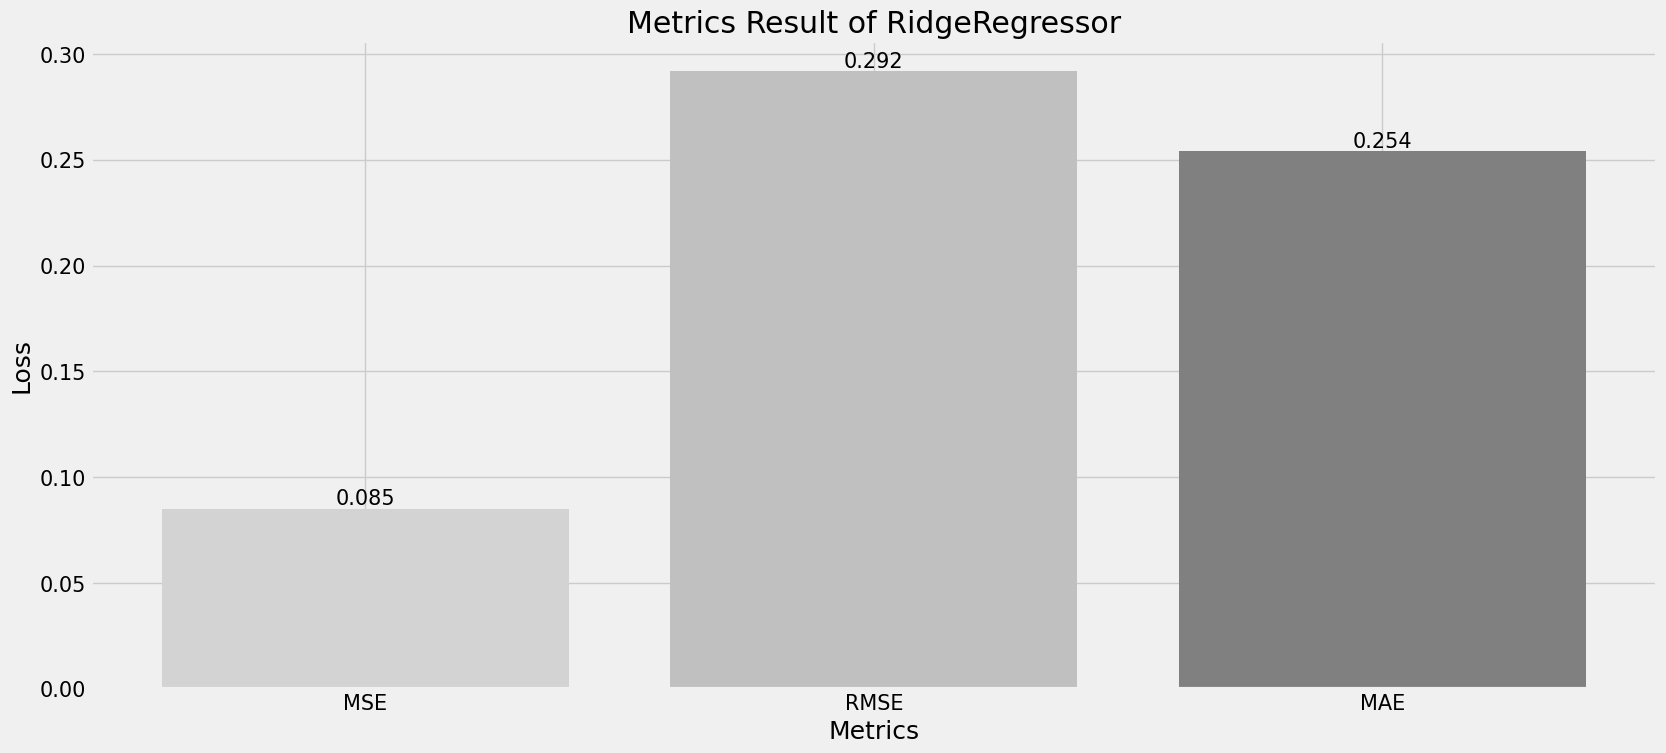

In [91]:
chart_data = [RR_MSE, RR_RMSE, RR_MAE]
chart_labels = ['MSE', 'RMSE', 'MAE']
chart_colors = ['lightgray', 'silver', 'gray']

with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    bars = plt.bar(
        x=chart_labels,
        height=chart_data,
        color=chart_colors
    )
    plt.title(label='Metrics Result of RidgeRegressor')
    plt.xlabel(xlabel='Metrics')
    plt.ylabel(ylabel='Loss')
    
    for bar, value in zip(bars, chart_data):
        plt.text(
            x=bar.get_x() + bar.get_width() / 2,
            y=bar.get_height(),
            s=f"{value:.3f}",
            ha='center',
            va='bottom'
        )
    plt.show()

In [92]:
Result['RR Prediction'] = coli_target_scaler.inverse_transform(RR_prediction.reshape(-1,1)).ravel()

Result.head(10)

,True Cost Of Living Index,GBR Prediction,RR Prediction
0,32.82,73.423816,76.958553
1,41.10,73.262823,74.833820
2,97.23,61.106851,71.943285
3,75.79,75.472653,75.359285
4,78.14,83.285420,79.587937
5,83.62,70.487476,75.225297
6,103.49,75.099339,74.724028
7,40.24,91.853723,75.107090
8,63.96,75.403068,74.450367
9,108.94,71.500100,78.410403


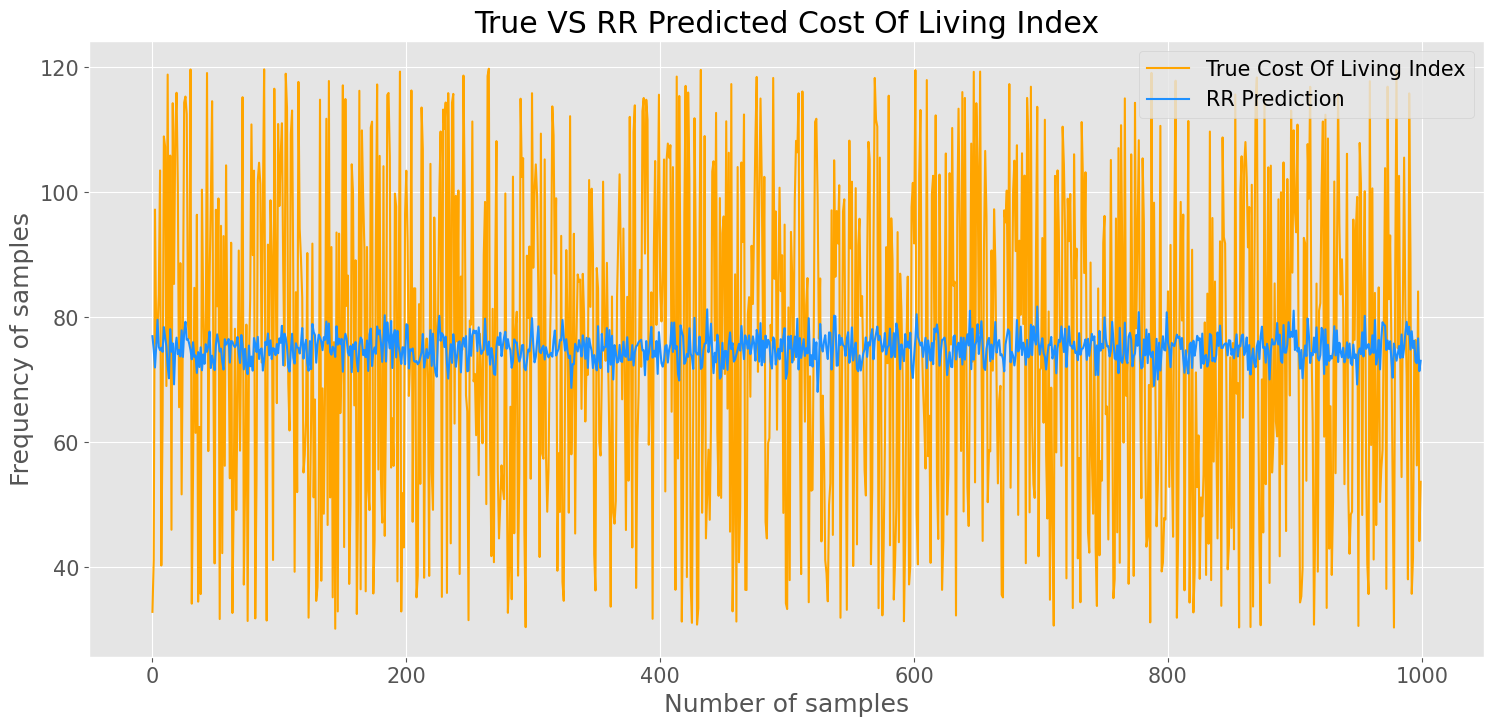

In [93]:
with plt.style.context(style="ggplot"):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    plt.plot(Result['True Cost Of Living Index'], color='orange', label='True Cost Of Living Index')
    plt.plot(Result['RR Prediction'], color='dodgerblue', label='RR Prediction')
    plt.title(label='True VS RR Predicted Cost Of Living Index')
    plt.xlabel(xlabel='Number of samples')
    plt.ylabel(ylabel='Frequency of samples')
    plt.legend()
    plt.show()

In [94]:
with open(file="models/coli_RidgeRegressor_model.pkl", mode="wb") as file:
    pickle.dump(obj=RR_model, file=file)

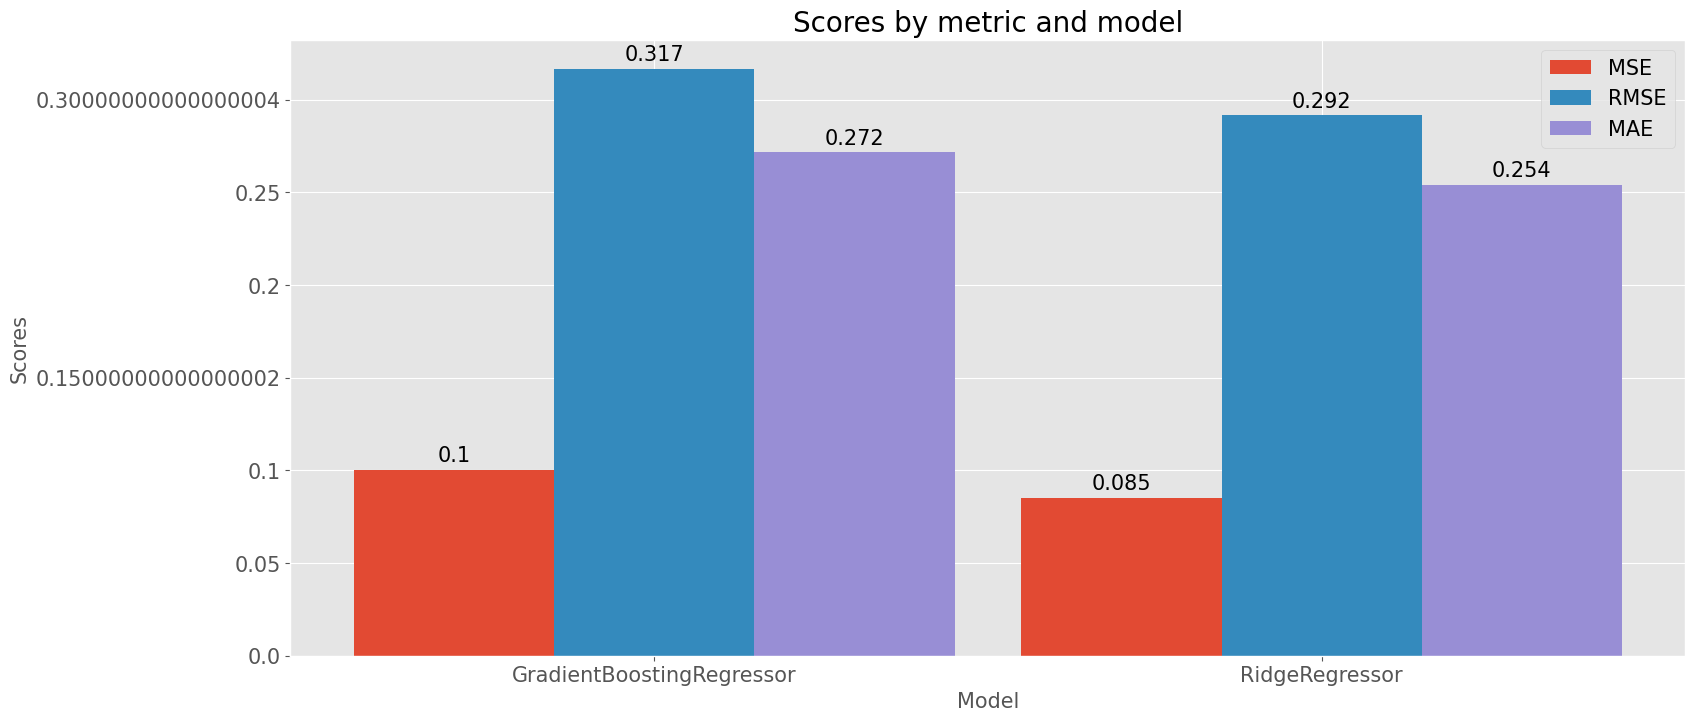

In [95]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

labels = ['GradientBoostingRegressor', 'RidgeRegressor']
mse_scores = [GB_MSE, RR_MSE]
rmse_scores = [GB_RMSE, RR_RMSE]
mae_scores = [GB_MAE, RR_MAE]

x = np.arange(len(labels))
width = 0.3

with plt.style.context(style="ggplot"):
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.rcParams['font.size'] = 15
    rects1 = ax.bar(x - width, mse_scores, width, label='MSE')
    rects2 = ax.bar(x, rmse_scores, width, label='RMSE')
    rects3 = ax.bar(x + width, mae_scores, width, label='MAE')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    ax.set_ylabel('Scores', fontsize=15)
    ax.set_xlabel('Model', fontsize=15)
    ax.set_title('Scores by metric and model', fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=15)
    ax.set_yticklabels(ax.get_yticks(), fontsize=15)
    ax.legend()

    plt.show()

---